In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read csv file to dataframe**

In [62]:

df = pd.read_csv("/content/Multi-Year Price Data (Aggregate).csv")

print(df.head())

       Date  Price
0  1/1/2012     99
1  1/2/2012     95
2  1/3/2012     96
3  1/4/2012     95
4  1/5/2012     93


**Preprocessing the Data**

In [63]:
# Adding the column 'Day', 'Month' and 'Year' seperatly.

df[["Month", "Day", "Year"]] = df["Date"].str.split("/", expand = True)
print(df.head(10))

df[["Month", "Day", "Year"]] = df[["Month", "Day", "Year"]].apply(pd.to_numeric)

        Date  Price Month Day  Year
0   1/1/2012     99     1   1  2012
1   1/2/2012     95     1   2  2012
2   1/3/2012     96     1   3  2012
3   1/4/2012     95     1   4  2012
4   1/5/2012     93     1   5  2012
5   1/6/2012     93     1   6  2012
6   1/7/2012     95     1   7  2012
7   1/8/2012     96     1   8  2012
8   1/9/2012     98     1   9  2012
9  1/10/2012     98     1  10  2012


In [64]:
#Importing all libraries for IsolationForest Regressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

**Plotting the Data**

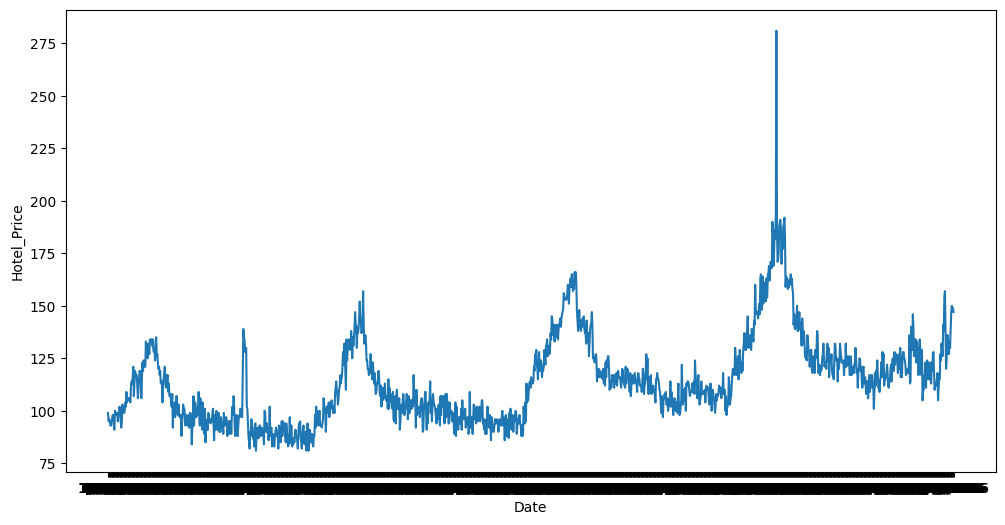

In [65]:
# df["Date"] = pd.to_datetime(df["Date"])
# df.set_index("Date", inplace=True)


# create line plot of Multi_Year Price data

# plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"])
plt.xlabel("Date")
plt.ylabel("Hotel_Price")
plt.show()


In [66]:
df = df.drop(['Date'],axis=1)

**IsolationForest for Outlier Detection**

In [55]:
outliers_fraction = float(.02) 

In [67]:
# Normalizing the data 

scaler = StandardScaler()
np_scaled = scaler.fit_transform(pd.DataFrame(df.Price))
data = pd.DataFrame(np_scaled)

In [68]:
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.02)

In [69]:
df['outlier'] = model.predict(data)

            Price
date             
2012-09-16     81
2012-12-13     81
2012-12-17     81
2015-03-03    171
2015-03-04    170
2015-03-06    190
2015-03-07    184
2015-03-09    176
2015-03-10    186
2015-03-11    182
2015-03-12    193
2015-03-13    281
2015-03-14    188
2015-03-15    171
2015-03-16    172
2015-03-17    176
2015-03-18    188
2015-03-19    190
2015-03-20    191
2015-03-21    186
2015-03-22    170
2015-03-23    182
2015-03-24    177
2015-03-25    188
2015-03-26    189
2015-03-27    192
2015-03-28    182
DatetimeIndex(['2012-09-16', '2012-12-13', '2012-12-17', '2015-03-03',
               '2015-03-04', '2015-03-06', '2015-03-07', '2015-03-09',
               '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
               '2015-03-14', '2015-03-15', '2015-03-16', '2015-03-17',
               '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-21',
               '2015-03-22', '2015-03-23', '2015-03-24', '2015-03-25',
               '2015-03-26', '2015-03-27', '2015-03-

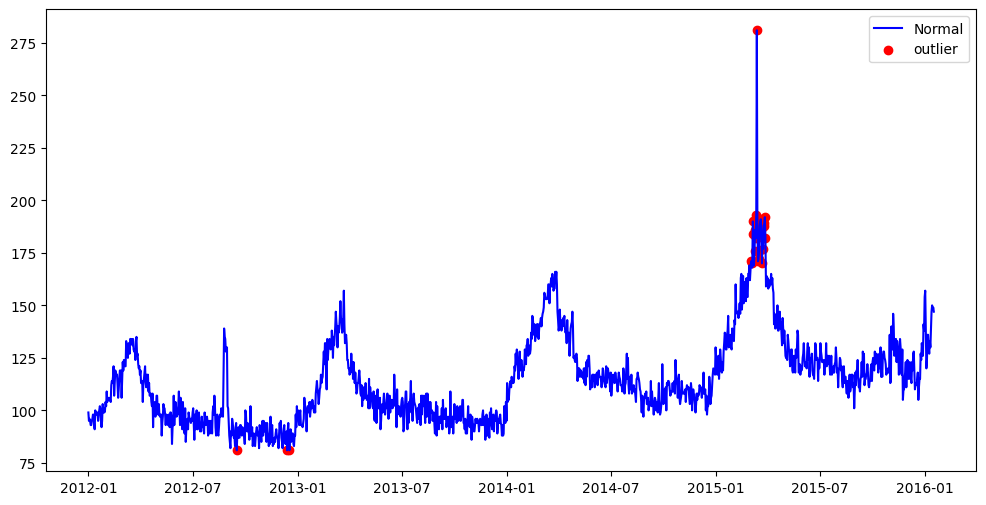

In [61]:
# visualization
fig, ax = plt.subplots(figsize=(12,6))

a = df.loc[df['outlier'] == -1, ['Price']] #anomaly

ax.plot(df.index, df['Price'], color='blue', label = 'Normal')
ax.scatter(a.index,a['Price'], color='red', label = 'outlier')
plt.legend()
plt.show();

In [70]:

df = df[['Day','Month','Year','Price','outlier']]
print(df.count())

Day        1476
Month      1476
Year       1476
Price      1476
outlier    1476
dtype: int64


**XGBoost Regressor For Prediction**

In [71]:

newdf = df[df["outlier"] == 1]
# print(newdf.count())

df = df.drop(["outlier"], axis=1)
newdf = newdf.drop(["outlier"], axis=1)
print(newdf.head())

# newdf = newdf.drop(["date"], axis=1)


   Day  Month  Year  Price
0    1      1  2012     99
1    2      1  2012     95
2    3      1  2012     96
3    4      1  2012     95
4    5      1  2012     93


In [72]:
#Split Data

X = newdf.iloc[:,:-1]
Y = newdf.iloc[:,-1]
Y.columns =['Price']





In [73]:
#Train and Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=42)

In [74]:
#XGBoost

from xgboost import XGBRegressor

xg_reg = XGBRegressor()

In [75]:
## Fitting the model

xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
#Predicting the price on x_test data
y_pred = xg_reg.predict(x_test)

In [77]:
y_pred

array([107.12081 , 101.37914 , 120.84765 , 139.89194 ,  89.61824 ,
        96.033325,  84.966705, 112.50301 , 100.64467 ,  87.73698 ,
       138.16637 , 137.56226 , 115.658195,  93.69923 , 110.36757 ,
        94.17663 , 156.53606 , 134.67766 , 117.71323 , 110.985886,
       113.47221 ,  91.99329 , 133.08305 ,  90.05952 ,  96.68514 ,
       123.21937 , 136.58644 , 108.5019  ,  88.71952 , 119.47344 ,
       103.83945 , 136.79774 , 127.89743 , 108.974266, 162.60178 ,
        88.24999 , 136.57498 , 118.833916, 128.34476 , 115.650696,
       101.04321 ,  89.07329 , 103.21758 , 115.41316 , 132.04637 ,
       123.28533 , 143.13774 , 106.37913 , 120.01208 , 122.862495,
       129.32286 ,  99.11524 , 105.0497  , 125.6783  , 117.315506,
       105.493904, 100.90773 , 132.79773 ,  93.824776, 132.4452  ,
       102.28302 , 120.84734 , 148.55803 , 156.74268 , 108.23029 ,
       153.72476 ,  96.96571 ,  98.83831 , 114.71618 , 123.4198  ,
        97.982796,  93.42424 ,  90.07836 , 123.29957 ,  92.562

In [78]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

32.689161763401565


In [79]:
rmse = np.sqrt(mse)
print(rmse)

5.7174436388478345


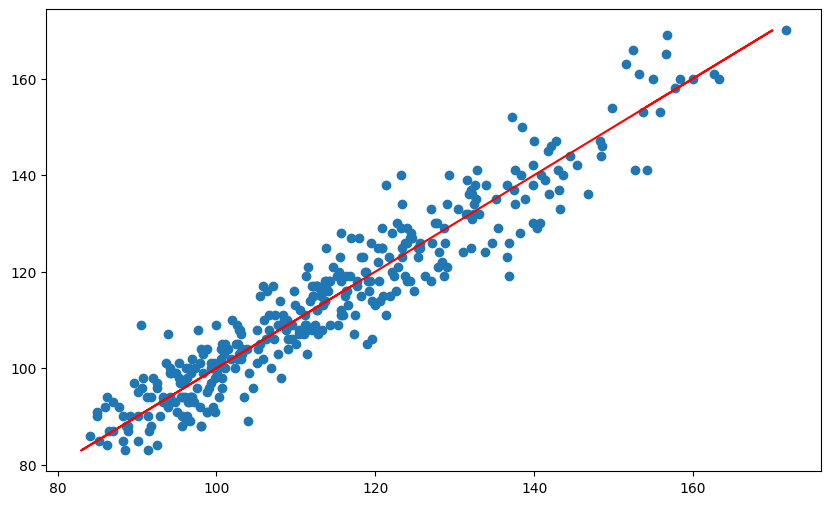

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_pred,y_test)
# plt.scatter(y_test,color='red' )

plt.plot(y_test,y_test,color='red')
plt.show()

In [81]:
# Prediction for February

day_list = list(range(1,29))
month_list = [2]*28
year_list = [2022]*28

temp = dict({"Day":day_list,"Month":month_list, "Year":year_list})

pred_df = pd.DataFrame(temp)
# pred_df.head()
# pred_df.tail()



**Predicted Hotel Price for February 2022 month**
 

In [82]:
feb_pred = xg_reg.predict(pred_df)
print(feb_pred)

[153.75722 136.77785 141.51135 156.3008  152.85152 151.2513  144.13535
 144.34445 147.06076 146.72945 153.80914 154.20638 163.75298 164.49994
 159.40884 159.67897 162.87114 155.60913 158.89586 156.8978  162.13306
 159.81567 161.96155 158.55724 157.24362 158.65848 166.17694 157.57545]


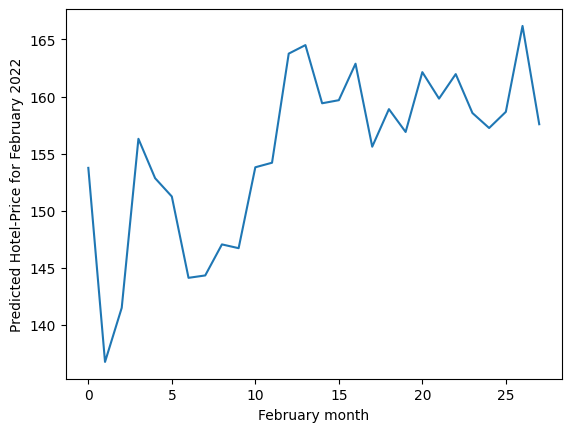

In [83]:
plt.plot(feb_pred)
plt.xlabel("February month")
plt.ylabel("Predicted Hotel-Price for February 2022")

plt.show()